In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the datasets
customers_file = "/content/Customers.csv"
products_file = "/content/Products.csv"
transactions_file = "/content/Transactions - Transactions.csv"

customers_df = pd.read_csv(customers_file)
products_df = pd.read_csv(products_file)
transactions_df = pd.read_csv(transactions_file)


In [4]:
customers_df["SignupDate"] = pd.to_datetime(customers_df["SignupDate"])
transactions_df["TransactionDate"] = pd.to_datetime(transactions_df["TransactionDate"])

# Checking for missing values
print("Missing Values:")
print(customers_df.isnull().sum())
print(products_df.isnull().sum())
print(transactions_df.isnull().sum())

Missing Values:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [5]:
# Summary statistics of transactions dataset
print("Transaction Summary Statistics:")
print(transactions_df.describe())


Transaction Summary Statistics:
                     TransactionDate     Quantity   TotalValue       Price
count                           1000  1000.000000  1000.000000  1000.00000
mean   2024-06-23 15:33:02.768999936     2.537000   689.995560   272.55407
min              2023-12-30 15:29:12     1.000000    16.080000    16.08000
25%       2024-03-25 22:05:34.500000     2.000000   295.295000   147.95000
50%       2024-06-26 17:21:52.500000     3.000000   588.880000   299.93000
75%              2024-09-19 14:19:57     4.000000  1011.660000   404.40000
max              2024-12-28 11:00:00     4.000000  1991.040000   497.76000
std                              NaN     1.117981   493.144478   140.73639


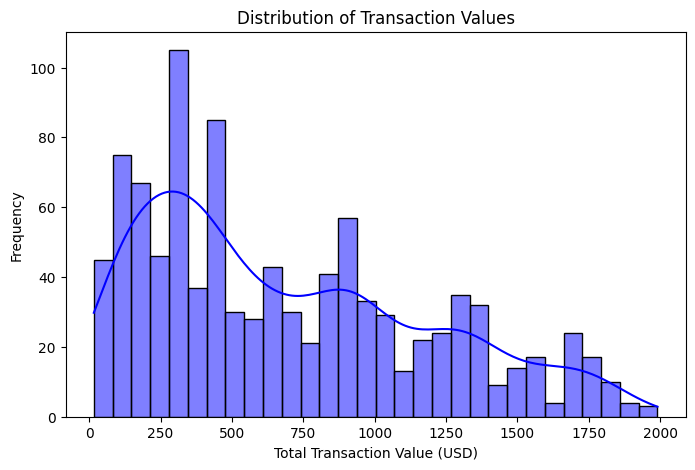

In [6]:
# Visualization: Distribution of Transaction Values
plt.figure(figsize=(8, 5))
sns.histplot(transactions_df["TotalValue"], bins=30, kde=True, color="blue")
plt.title("Distribution of Transaction Values")
plt.xlabel("Total Transaction Value (USD)")
plt.ylabel("Frequency")
plt.show()

<ipython-input-7-738920878eb3>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.index, y=top_products.values, palette="viridis")


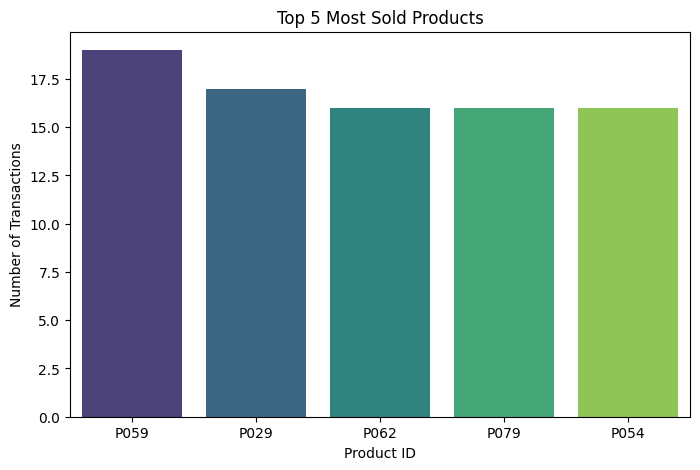

In [7]:
# Top 5 most sold products
top_products = transactions_df["ProductID"].value_counts().head(5)
plt.figure(figsize=(8, 5))
sns.barplot(x=top_products.index, y=top_products.values, palette="viridis")
plt.title("Top 5 Most Sold Products")
plt.xlabel("Product ID")
plt.ylabel("Number of Transactions")
plt.show()

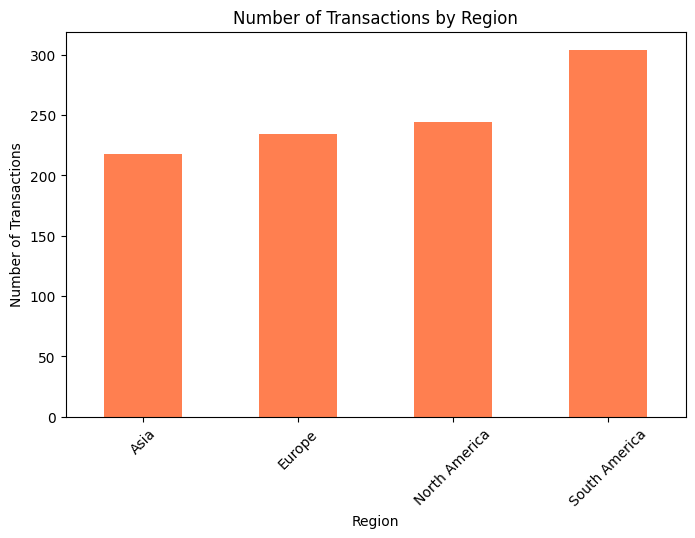

In [8]:
# Transactions per region
transactions_per_region = customers_df.merge(transactions_df, on="CustomerID").groupby("Region").size()

plt.figure(figsize=(8, 5))
transactions_per_region.plot(kind="bar", color="coral")
plt.title("Number of Transactions by Region")
plt.xlabel("Region")
plt.ylabel("Number of Transactions")
plt.xticks(rotation=45)
plt.show()